In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches
%matplotlib inline
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fonm
from matplotlib import font_manager, rc
mpl.rcParams['axes.unicode_minus'] = False
font_path = "C:/Windows/Fonts/HMKMRHD.ttf"
font = fonm.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
Basic_dir = os.path.dirname(os.path.dirname(os.path.realpath('EDA.ipynb')))
PATH = Basic_dir + '\\Data\\Data(PenW_B)'
os.listdir(PATH)

['sample_submission(0).csv',
 'sample_submission(1).csv',
 'sample_submission(2).csv',
 'sample_submission(3).csv',
 'sample_submission(3_statsmodel).csv',
 'sample_submission(4_lR).csv',
 'sample_submission(5_RandomForest).csv',
 'sample_submission(6_RandomForest).csv',
 'sample_submission.csv',
 'test.csv',
 'test_Ch.csv',
 'train.csv',
 'train_Ch.csv',
 'train_pred_sex.csv']

In [3]:
train = pd.read_csv(PATH + '\\train.csv')
train.drop(['id'], axis = True, inplace = True)
train.dropna(inplace=True)
train.reset_index(drop = True, inplace = True)
train.columns = ['Species', 'Island', 'Clutch Completion', 'Culmen_Length',
                 'Culmen_Depth', 'Flipper_Length', 'Sex', 'Delta_15_N',
                 'Delta_13_C', 'Body_Mass']
print(train[train.Sex == 'MALE'].Flipper_Length.mean())
print(train[train.Sex == 'FEMALE'].Flipper_Length.mean())
print(train.Flipper_Length.mean())

207.21818181818182
199.72222222222223
203.5045871559633


In [4]:
train = pd.read_csv(PATH + '\\train.csv')
train.drop(['id'], axis = True, inplace = True)
train.dropna(inplace=True)
train.reset_index(drop = True, inplace = True)
train.columns = ['Species', 'Island', 'Clutch Completion', 'Culmen_Length',
                 'Culmen_Depth', 'Flipper_Length', 'Sex', 'Delta_15_N',
                 'Delta_13_C', 'Body_Mass']
print(train.columns)
# 데이터 분석을 위한 원-핫 인코딩 
sp_list = list(train.Species.unique())
sp_index = [x for x in range(len(sp_list))]
sp_dict = dict(zip(sp_list, sp_index)) 
train.Species = train.Species.apply(lambda x: sp_dict[x])

land_list = list(train.Island.unique())
land_index = [x for x in range(len(land_list))]
land_dict = dict(zip(land_list, land_index)) 
train.Island = train.Island.apply(lambda x: land_dict[x])

CC_list = list(train['Clutch Completion'].unique())
CC_index = [x for x in range(len(CC_list))]
CC_dict = dict(zip(CC_list, CC_index)) 
train['Clutch Completion'] = train['Clutch Completion'].apply(lambda x: CC_dict[x])

sex_list = list(train.Sex.unique())
sex_index = [x for x in range(len(sex_list))]
sex_dict = dict(zip(sex_list, sex_index)) 
train.Sex = train.Sex.apply(lambda x: sex_dict[x])

train.dtypes
train.head()

Index(['Species', 'Island', 'Clutch Completion', 'Culmen_Length',
       'Culmen_Depth', 'Flipper_Length', 'Sex', 'Delta_15_N', 'Delta_13_C',
       'Body_Mass'],
      dtype='object')


,Species,Island,Clutch Completion,Culmen_Length,Culmen_Depth,Flipper_Length,Sex,Delta_15_N,Delta_13_C,Body_Mass
0,0,0,0,50.0,15.3,220,0,8.30515,-25.19017,5550
1,1,1,1,49.5,19.0,200,0,9.63074,-24.34684,3800
2,0,0,0,45.1,14.4,210,1,8.51951,-27.01854,4400
3,0,0,0,44.5,14.7,214,1,8.20106,-26.16524,4850
4,0,0,1,49.6,16.0,225,0,8.38324,-26.84272,5700


In [5]:
test = pd.read_csv(PATH + '\\test.csv')
test.isnull().sum()

id                     0
Species                0
Island                 0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Sex                    6
Delta 15 N (o/oo)      9
Delta 13 C (o/oo)      8
dtype: int64

In [6]:
null_list = []
for i in range(len((test.isna().sum(axis=1)>=1))):
    if (test.isna().sum(axis=1)>=1)[i] == True:
        null_list.append(i)
test.iloc[null_list, :]

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
27,27,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,38.6,21.2,191.0,MALE,NaN,NaN
46,46,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,37.8,17.1,186.0,NaN,8.63243,-25.21315
75,75,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,51.9,19.5,206.0,MALE,NaN,-23.78767
81,81,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,37.5,18.9,179.0,NaN,NaN,NaN
98,98,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,47.3,13.8,216.0,NaN,8.25818,-26.23886
106,106,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,47.3,15.3,222.0,MALE,NaN,NaN
152,152,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,15.7,217.0,NaN,8.04111,-26.18444
159,159,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,41.1,17.6,182.0,FEMALE,NaN,NaN
175,175,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,40.8,18.4,195.0,MALE,NaN,NaN
202,202,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.1,18.7,181.0,MALE,NaN,NaN


In [7]:
standard1 = 203
test.Sex = test.Sex.apply(lambda x: str(x))
for i in range(len(test)):
    if test.Sex[i] == 'nan':
        if test['Flipper Length (mm)'][i] >= standard1:
            test.Sex[i] = 'MALE'
        else:
            test.Sex[i] = 'FEMALE'

<ipython-input-7-7778db52bf7b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.Sex[i] = 'FEMALE'
<ipython-input-7-7778db52bf7b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.Sex[i] = 'MALE'


In [8]:
test['Delta 15 N (o/oo)'].fillna(test['Delta 15 N (o/oo)'].mean(), inplace=True)
test['Delta 13 C (o/oo)'].fillna(test['Delta 13 C (o/oo)'].mean(), inplace=True)

In [9]:
test.isna().sum()

id                     0
Species                0
Island                 0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64

In [10]:
# test = pd.read_csv(PATH + '\\test.csv')
test.drop(['id'], axis = True, inplace = True)
test.columns = ['Species', 'Island', 'Clutch Completion', 'Culmen_Length',
                 'Culmen_Depth', 'Flipper_Length', 'Sex', 'Delta_15_N',
                 'Delta_13_C']
print(test.columns)
sp_list = list(test.Species.unique())
sp_index = [x for x in range(len(sp_list))]
sp_dict = dict(zip(sp_list, sp_index)) 
test.Species = test.Species.apply(lambda x: sp_dict[x])

land_list = list(test.Island.unique())
land_index = [x for x in range(len(land_list))]
land_dict = dict(zip(land_list, land_index)) 
test.Island = test.Island.apply(lambda x: land_dict[x])

CC_list = list(test['Clutch Completion'].unique())
CC_index = [x for x in range(len(CC_list))]
CC_dict = dict(zip(CC_list, CC_index)) 
test['Clutch Completion'] = test['Clutch Completion'].apply(lambda x: CC_dict[x])

sex_list = list(test.Sex.unique())
sex_index = [x for x in range(len(sex_list))]
sex_dict = dict(zip(sex_list, sex_index)) 
test.Sex = test.Sex.apply(lambda x: sex_dict[x])

test.dtypes
test.head()

Index(['Species', 'Island', 'Clutch Completion', 'Culmen_Length',
       'Culmen_Depth', 'Flipper_Length', 'Sex', 'Delta_15_N', 'Delta_13_C'],
      dtype='object')


,Species,Island,Clutch Completion,Culmen_Length,Culmen_Depth,Flipper_Length,Sex,Delta_15_N,Delta_13_C
0,0,0,0,52.0,20.7,210.0,0,9.43146,-24.68440
1,1,1,0,55.9,17.0,228.0,0,8.31180,-26.35425
2,2,0,0,38.9,18.8,190.0,1,8.36936,-26.11199
3,0,0,0,45.2,16.6,191.0,1,9.62357,-24.78984
4,2,1,1,37.9,18.6,172.0,1,8.38404,-25.19837


In [11]:
from sklearn.linear_model import LinearRegression
# 사용할 변수리스트
# x_list = W['Flipper_Length', 'Species', 'Sex'] # (1) - 최저 / intercept = True
# x_list = ['Flipper_Length', 'Species', 'Sex', 'Delta_15_N'] # (0) - (0) > (1) / intercept = True
x_list = ['Flipper_Length', 'Species', 'Sex', 'Delta_15_N'] # (2) - (2) > (1) / intercept = False



# lm = LinearRegression(fit_intercept = True)
lm = LinearRegression(fit_intercept = False)
lm.fit(train[x_list], train.Body_Mass)
print(lm.coef_)
lm.predict(train[x_list]) - train.Body_Mass 

[  33.52796658 -114.7858313  -442.93728806 -247.65360614]


0     -230.647700
1      405.719993
2       88.048319
3     -148.974524
4     -232.347137
          ...    
104    379.837990
105   -365.397224
106   -113.716840
107    751.182443
108     -4.778901
Name: Body_Mass, Length: 109, dtype: float64

In [12]:
def RMSE(true, pred):
    score = np.sqrt(np.mean(np.square(true-pred)))
    return score

RMSE(lm.predict(train[x_list]), train.Body_Mass)

308.2414985837879

In [13]:
# 정답파일 작성
predict = pd.read_csv(PATH + '\\sample_submission.csv')
len(predict), len(test)
predict['Body Mass (g)'] = lm.predict(test[x_list])
predict
# predict.to_csv(PATH + '\\sample_submission(2).csv', index = False)
# pd.read_csv(PATH + '\\sample_submission(2).csv').head()

,id,Body Mass (g)
0,0,4705.137901
1,1,5471.143305
2,2,3625.102514
3,3,3577.592514
4,4,3017.963560
...,...,...
223,223,4357.356069
224,224,4591.771614
225,225,4503.084985
226,226,4310.654785


In [14]:
from statsmodels.formula.api import ols 
from statsmodels.api import OLS, add_constant
x_list = x_list = ['Flipper_Length', 'Species', 'Sex', 'Delta_15_N']
formula = 'Body_Mass~' + '+'.join(x_list)
model = OLS.from_formula(formula, data = train[x_list + ['Body_Mass']])
result = model.fit()
# print(result.params)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Body_Mass   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     148.2
Date:                Wed, 29 Dec 2021   Prob (F-statistic):           5.07e-42
Time:                        00:07:41   Log-Likelihood:                -778.02
No. Observations:                 109   AIC:                             1566.
Df Residuals:                     104   BIC:                             1579.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2342.0778   1469.537      1.594      0.114    -572.069    5256.225
Flipper_Length    25.7192      5.242      4.906      0.000      15.323      36.115
Species         -206.4239     78.548     -2.628      0.010    -362.188     -50.659
Sex             -518.0692     75.799     -6.835      0.000    -668.381    -367.758
Delta_15_N      -319.9230     66.097     -4.840      0.000    -450.997    -188.849
==============================================================================
Omnibus:                        2.121   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.346   Jarque-Bera (JB):                1.559
Skew:                           0.242   Prob(JB):                        0.459
Kurtosis:                       3.330   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
result.predict(train[x_list]) - train.Body_Mass 

0     -206.716866
1      398.389499
2       99.443751
3     -145.800164
4     -253.103886
          ...    
104    299.749012
105   -348.648406
106   -102.481668
107    718.532603
108    -41.087619
Length: 109, dtype: float64

In [16]:
def RMSE(true, pred):
    score = np.sqrt(np.mean(np.square(true-pred)))
    return score

RMSE(result.predict(train[x_list]), train.Body_Mass)

304.54490372550475

In [17]:
# 정답파일 작성
predict = pd.read_csv(PATH + '\\sample_submission.csv')
len(predict), len(test)
predict['Body Mass (g)'] = result.predict(test[x_list])
predict.to_csv(PATH + '\\sample_submission(3_statsmodel).csv', index = False)
pd.read_csv(PATH + '\\sample_submission(3_statsmodel).csv').head()

,id,Body Mass (g)
0,0,4725.759152
1,1,5340.485000
2,2,3620.249382
3,3,3657.565678
4,4,3152.608157


In [18]:
# 랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor

value = [0, 0]
plot_list1 = []
plot_list2 = []
for i in range(1, 100):
    rf = RandomForestRegressor(n_estimators = i,random_state = 7)
    rf.fit(train[x_list], train.Body_Mass)
    plot_list1.append(rf.score(train[x_list], train.Body_Mass))
    plot_list2.append(RMSE(rf.predict(train[x_list]), train.Body_Mass))
    if value[1] < rf.score(train[x_list], train.Body_Mass):
        value[0] = i
        value[1] = rf.score(train[x_list], train.Body_Mass)
value 

[54, 0.9754913760208679]

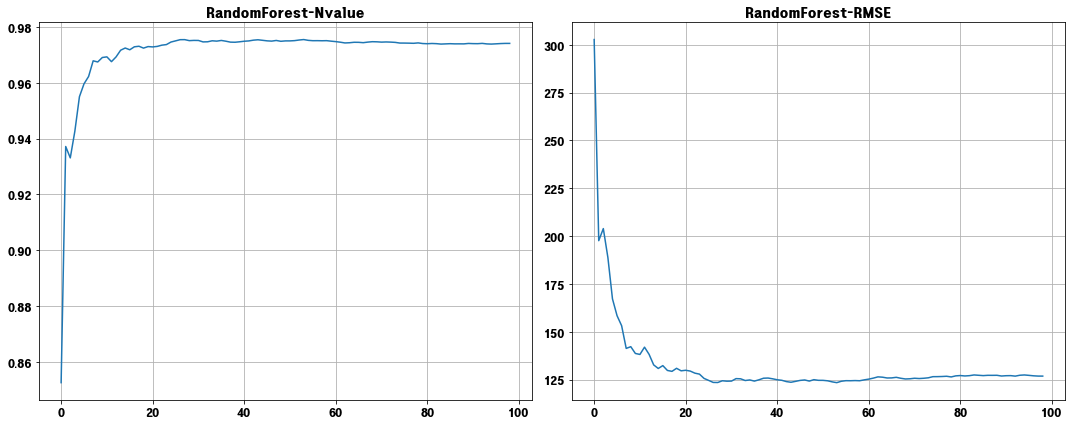

In [19]:
fig, axes = plt.subplots(1, 2, figsize = (15, 6), sharey = False) # 축 범위를 같게하고 싶으면 sharey를 True로 변경

ax = axes[0]
ax.set_title('RandomForest-Nvalue')
ax.plot(plot_list1)
ax.grid()

ax = axes[1]
ax.set_title('RandomForest-RMSE')
ax.plot(plot_list2)
ax.grid()

plt.tight_layout()
plt.show()

In [20]:
rf= RandomForestRegressor(n_estimators = 54,random_state = 7)
rf.fit(train[x_list], train.Body_Mass)
RMSE(rf.predict(train[x_list]), train.Body_Mass)

123.39530125782659

In [21]:
# 정답파일 작성
predict = pd.read_csv(PATH + '\\sample_submission.csv')
len(predict), len(test)
predict['Body Mass (g)'] = rf.predict(test[x_list])
predict.to_csv(PATH + '\\sample_submission(7_RandomForest).csv', index = False)
pd.read_csv(PATH + '\\sample_submission(7_RandomForest).csv')

,id,Body Mass (g)
0,0,4620.833333
1,1,5035.648148
2,2,3568.981481
3,3,3913.888889
4,4,3450.925926
...,...,...
223,223,4638.888889
224,224,4252.314815
225,225,4100.925926
226,226,4165.277778
